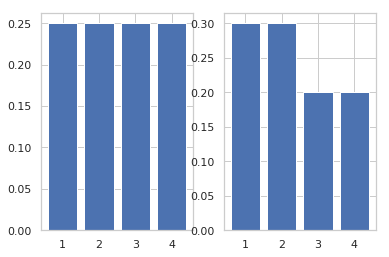

In [1]:
%matplotlib inline
#이론
mu_1 = np.array([1/4]*4)
mu_2 = np.array([0.3, 0.3, 0.2, 0.2])
rv1 = sp.stats.multinomial(1, mu_1)
rv2 = sp.stats.multinomial(1, mu_2)

xx = np.arange(1, 4+1)
xx_onehotencoding = pd.get_dummies(xx)

fig, axes = plt.subplots(1,2)
axes[0].bar(xx, rv1.pmf(xx_onehotencoding.values), tick_label=xx)
axes[1].bar(xx, rv2.pmf(xx_onehotencoding.values), tick_label=xx)
plt.show()

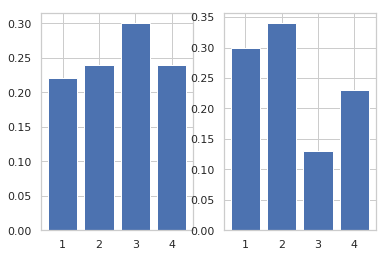

In [2]:
#시뮬레이션
x1 = rv1.rvs(100)
x2 = rv2.rvs(100)
y1 = x1.sum(axis=0) / float(len(x1))
y2 = x2.sum(axis=0) / float(len(x2))

fig, axes = plt.subplots(1,2)
axes[0].bar(xx, y1, tick_label=xx)
axes[1].bar(xx, y2, tick_label=xx)
plt.show()

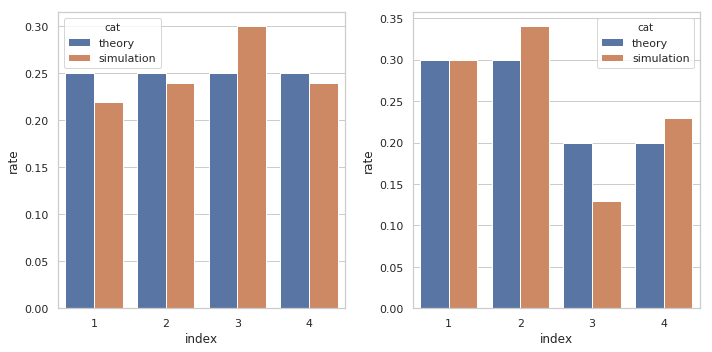

In [3]:
#이론 vs 시뮬레이션
df1 = pd.DataFrame({'theory': rv1.pmf(xx_onehotencoding.values), 'simulation': y1}, index=np.arange(1, 4+1))
df1_1 = df1.reset_index()
df1_2 = pd.melt(df1_1, id_vars='index', var_name='cat', value_name='rate')

df2 = pd.DataFrame({'theory': rv2.pmf(xx_onehotencoding.values), 'simulation': y2}, index=np.arange(1, 4+1))
df2_1 = df2.reset_index()
df2_2 = pd.melt(df2_1, id_vars='index', var_name='cat', value_name='rate')

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.barplot(x='index', y='rate', hue='cat', data=df1_2, ax=ax[0])
sns.barplot(x='index', y='rate', hue='cat', data=df2_2, ax=ax[1])
plt.tight_layout()
plt.show()